
CLASS TASK LAB 10




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 13.6 MB/s eta 0:00:00
Temperature: 18°C → Action: 38.83 %
Temperature: 24°C → Action: 50.0 %
Temperature: 32°C → Action: 80.24 %


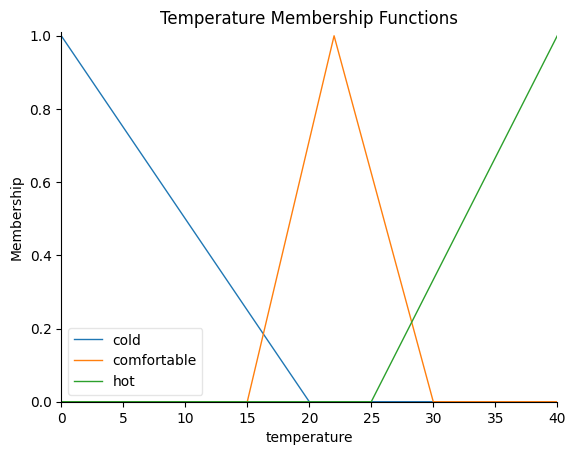

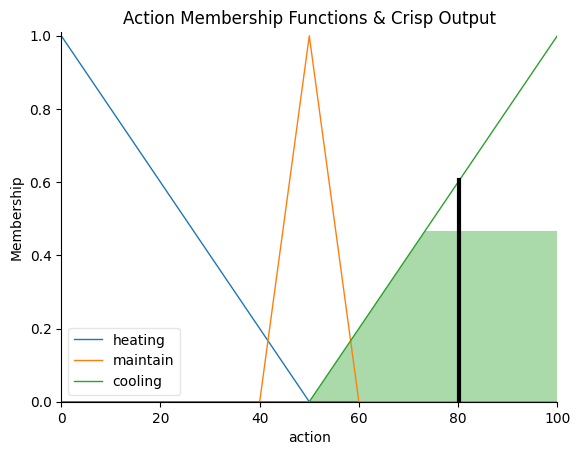

In [4]:
#CLASS TASK 1
#Task 1: (Rule Evaluation for room temperature control):
#A hotel requires a fuzzy logic system to optimize room temperature control. The system should
#implement rules such as:
#Increase heating if the temperature is "Cold."
#Maintain the current setting if the temperature is "Comfortable."
#Increase cooling if the temperature is "Hot."
#Design and implement these rules, then simulate the system for temperatures of
#8°C, 24°C, and 32°C. Explain the reasoning behind the system’s Actions
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Input variable
temperature = ctrl.Antecedent(np.arange(0, 41, 1), 'temperature')

# Output variable
action = ctrl.Consequent(np.arange(0, 101, 1), 'action')

# Membership functions (Temperature)
temperature['cold'] = fuzz.trimf(temperature.universe, [0, 0, 20])
temperature['comfortable'] = fuzz.trimf(temperature.universe, [15, 22, 30])
temperature['hot'] = fuzz.trimf(temperature.universe, [25, 40, 40])

# Membership functions (Action)
action['heating'] = fuzz.trimf(action.universe, [0, 0, 50])
action['maintain'] = fuzz.trimf(action.universe, [40, 50, 60])
action['cooling'] = fuzz.trimf(action.universe, [50, 100, 100])

# Rules
rule1 = ctrl.Rule(temperature['cold'], action['heating'])
rule2 = ctrl.Rule(temperature['comfortable'], action['maintain'])
rule3 = ctrl.Rule(temperature['hot'], action['cooling'])

# Control system
system = ctrl.ControlSystem([rule1, rule2, rule3])
simulation = ctrl.ControlSystemSimulation(system)

# Temperatures to test
test_temperatures = [18, 24, 32]

# Simulation
for temp in test_temperatures:
    simulation.input['temperature'] = temp
    simulation.compute()
    print(f"Temperature: {temp}°C → Action: {round(simulation.output['action'], 2)} %")

# Plot temperature membership functions
temperature.view()
plt.title("Temperature Membership Functions")

# Plot action membership functions with last simulation result
action.view(sim=simulation)
plt.title("Action Membership Functions & Crisp Output")

plt.show()


Crisp Cooking Time: 60.0 minutes


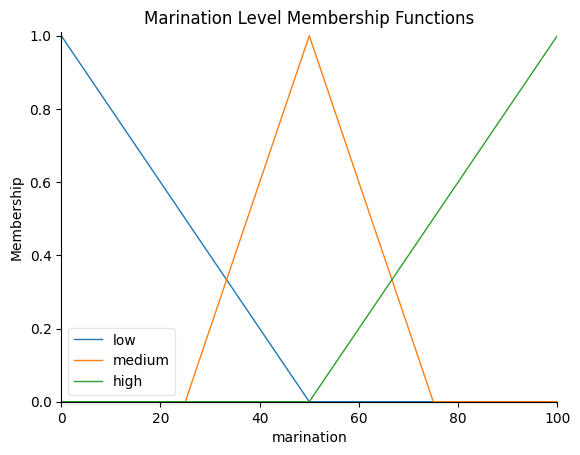

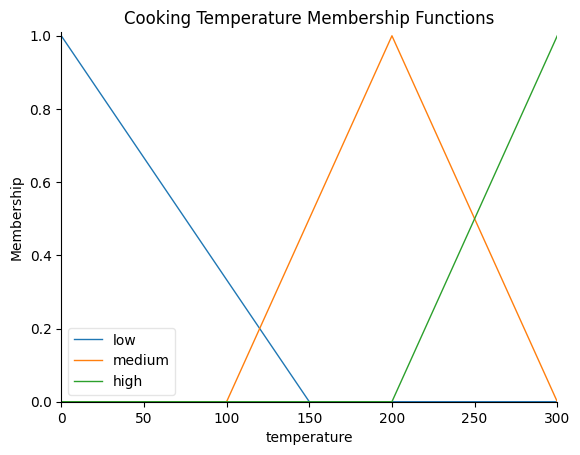

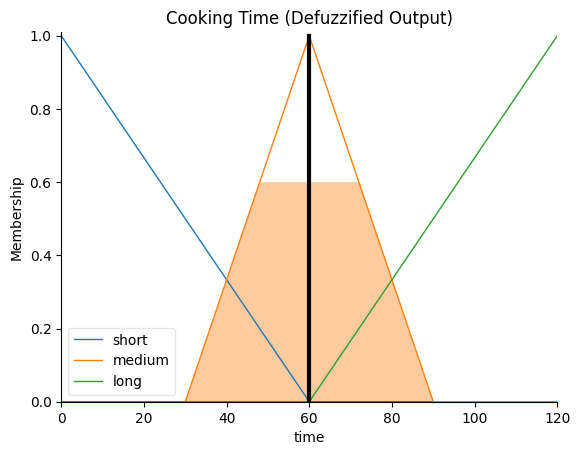

In [5]:
#CLASS TASK 2
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
# Inputs
marination = ctrl.Antecedent(np.arange(0, 101, 1), 'marination')
temperature = ctrl.Antecedent(np.arange(0, 301, 1), 'temperature')
# Output
time = ctrl.Consequent(np.arange(0, 121, 1), 'time')
# Membership functions
marination['low'] = fuzz.trimf(marination.universe, [0, 0, 50])
marination['medium'] = fuzz.trimf(marination.universe, [25, 50, 75])
marination['high'] = fuzz.trimf(marination.universe, [50, 100, 100])
temperature['low'] = fuzz.trimf(temperature.universe, [0, 0, 150])
temperature['medium'] = fuzz.trimf(temperature.universe, [100, 200, 300])
temperature['high'] = fuzz.trimf(temperature.universe, [200, 300, 300])
time['short'] = fuzz.trimf(time.universe, [0, 0, 60])
time['medium'] = fuzz.trimf(time.universe, [30, 60, 90])
time['long'] = fuzz.trimf(time.universe, [60, 120, 120])
# Rules
rule1 = ctrl.Rule(marination['high'] & temperature['high'], time['short'])
rule2 = ctrl.Rule(marination['medium'] & temperature['medium'],
time['medium'])
rule3 = ctrl.Rule(marination['low'] & temperature['low'], time['long'])
# System
system = ctrl.ControlSystem([rule1, rule2, rule3])
sim = ctrl.ControlSystemSimulation(system)
# Input values
sim.input['marination'] = 60
sim.input['temperature'] = 200
sim.compute()
# Output
print("Crisp Cooking Time:", round(sim.output['time'], 2), "minutes")
marination.view()
plt.title("Marination Level Membership Functions")
temperature.view()
plt.title("Cooking Temperature Membership Functions")
time.view(sim=sim)
plt.title("Cooking Time (Defuzzified Output)")
plt.show()